# K-Nearest Neighbor
*Complete and hand in this completed worksheet (including its outputs and any supporting code outside of the worksheet) with your assignment submission. Please check the pdf file for more details.*

In this exercise you will:
    
- implement the **K-Nearest Neighbor** algorithm
- play with the hyperparameter K 
- try KNN on **real-world data**, i.e. the CAPTCHA of a website in ZJU

Please note that **YOU CANNOT USE ANY MACHINE LEARNING PACKAGE SUCH AS SKLEARN** for any homework, unless you are asked.

In [1]:
# some basic imports
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook


%load_ext autoreload
%autoreload 2

### KNN experiment with hyperparameter K

(20160, 1)
(20160, 1)
(20160, 1)


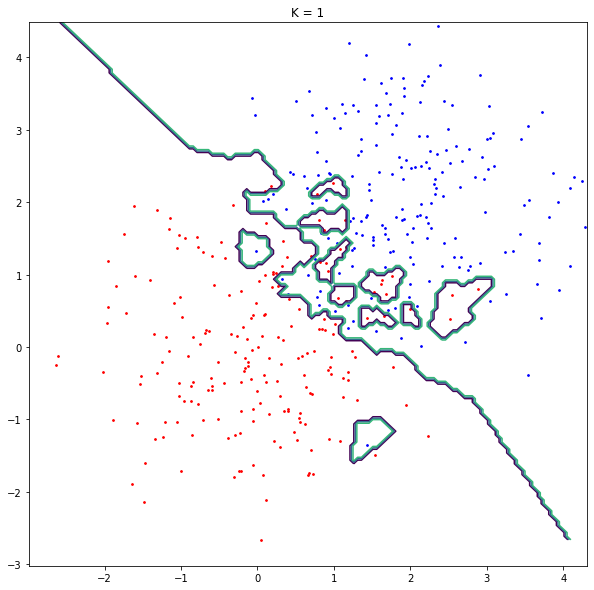

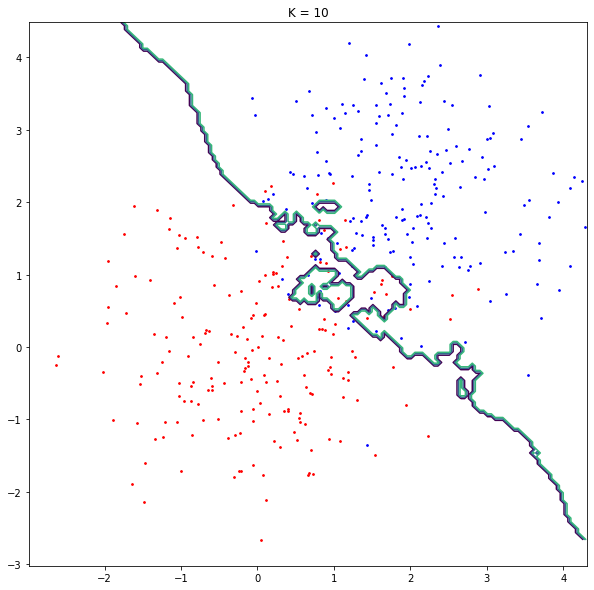

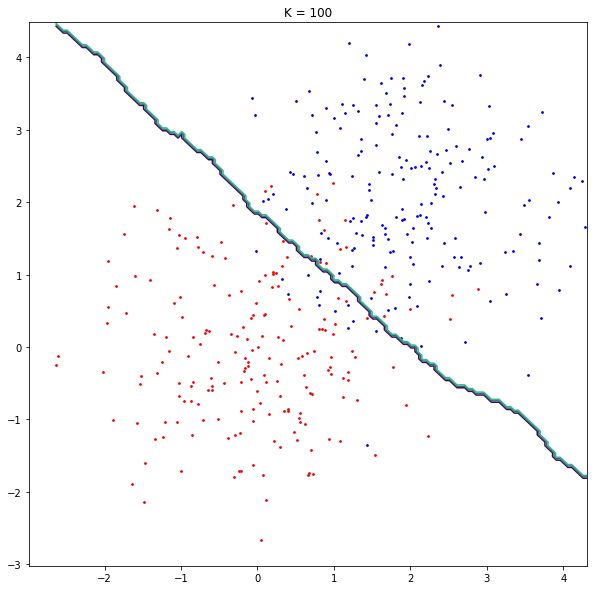

In [20]:
from mkdata import mkdata
from knn_plot import knn_plot

[X, y] = mkdata()


K = [1, 10, 100]
for k in K:
    knn_plot(X, y, k)

### Now Let's hack the website http://jwbinfosys.zju.edu.cn/default2.aspx

In [21]:
from hack import hack
from extract_image import extract_image
from show_image import show_image

In [22]:
test_img = './CheckCode.aspx'  # change it yourself
# x = extract_image(test_img)
# show_image(x)
hack(test_img)

FileNotFoundError: [Errno 2] No such file or directory: 'hack_data.npz'